In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests, time
from config import weather_api_key
from datetime import datetime
import sys
from scipy.stats import linregress
import gmaps
import gmaps.datasets
import matplotlib.pyplot as plt
from config import g_api_key

In [4]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(f"{title}")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    print(f'The r-value is {r_value:.2}')

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Initiate a dictionary of cities not found and error code
cities_not_located = {}

# Initiate list for city data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        
#         if set_count ==2:
#             break
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,          
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        err = sys.exc_info()[0]
        cities_not_located[i]=({"City":city,"Error Code":err})
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | manaure
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | kasongo-lunda
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | ouadda
Processing Record 8 of Set 1 | fort dix
Processing Record 9 of Set 1 | cockburn town
Processing Record 10 of Set 1 | caravelas
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | jvari
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | yeniseysk
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | krasnyy yar
Processing Record 19 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 

City not found. Skipping...
Processing Record 34 of Set 4 | cairns
Processing Record 35 of Set 4 | victoria
Processing Record 36 of Set 4 | boa vista
Processing Record 37 of Set 4 | chagda
City not found. Skipping...
Processing Record 38 of Set 4 | chuy
Processing Record 39 of Set 4 | leshukonskoye
Processing Record 40 of Set 4 | minsk
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | gasa
Processing Record 45 of Set 4 | yumen
Processing Record 46 of Set 4 | nelson bay
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | ubeda
Processing Record 49 of Set 4 | shitanjing
Processing Record 50 of Set 4 | veraval
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | sjenica
Processing Record 3 of Set 5 | whitehorse
Processing Record 4 of Set 5 | umm lajj
Processing Record 5 of Set 5 | sao filipe
Processing Record 6 of Set 5 | nikolskoye
Processing Rec

Processing Record 28 of Set 8 | flores da cunha
Processing Record 29 of Set 8 | college
Processing Record 30 of Set 8 | imbituba
Processing Record 31 of Set 8 | suao
City not found. Skipping...
Processing Record 32 of Set 8 | kuah
Processing Record 33 of Set 8 | usinsk
Processing Record 34 of Set 8 | corralillo
Processing Record 35 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 36 of Set 8 | solnechnyy
Processing Record 37 of Set 8 | virginia beach
Processing Record 38 of Set 8 | gorkovskoye
City not found. Skipping...
Processing Record 39 of Set 8 | tilichiki
Processing Record 40 of Set 8 | winnemucca
Processing Record 41 of Set 8 | bathsheba
Processing Record 42 of Set 8 | hofn
Processing Record 43 of Set 8 | cascais
Processing Record 44 of Set 8 | otradnoye
Processing Record 45 of Set 8 | berdigestyakh
Processing Record 46 of Set 8 | tucumcari
Processing Record 47 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 48 of Set 8 | nouadhibou
Pro

Processing Record 18 of Set 12 | pombia
Processing Record 19 of Set 12 | paucartambo
City not found. Skipping...
Processing Record 20 of Set 12 | carpentras
Processing Record 21 of Set 12 | rio pardo de minas
Processing Record 22 of Set 12 | puerto del rosario
Processing Record 23 of Set 12 | gualeguaychu
Processing Record 24 of Set 12 | lao cai
Processing Record 25 of Set 12 | pedernales
Processing Record 26 of Set 12 | port hedland
Processing Record 27 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 28 of Set 12 | aksu
Processing Record 29 of Set 12 | hambantota
Processing Record 30 of Set 12 | launceston
Processing Record 31 of Set 12 | karaul
City not found. Skipping...
Processing Record 32 of Set 12 | guane
Processing Record 33 of Set 12 | hervey bay
Processing Record 34 of Set 12 | synya
Processing Record 35 of Set 12 | stepnyak
Processing Record 36 of Set 12 | lagos
Processing Record 37 of Set 12 | chulym
Processing Record 38 of Set 12 | baykit
Processing Re

In [9]:

# Check how many error there were when trying to pull the weather data.
print(len(city_data))
print(len(cities_not_located))

557
49


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df_new = city_data_df[new_column_order]

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lngs = city_data_df["Lng"]
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Get today's date in seconds.
today = time.strftime("%x")

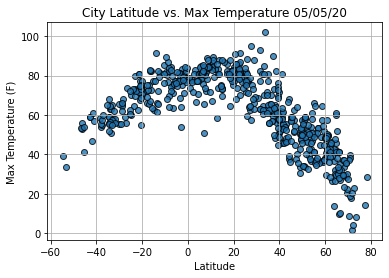

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

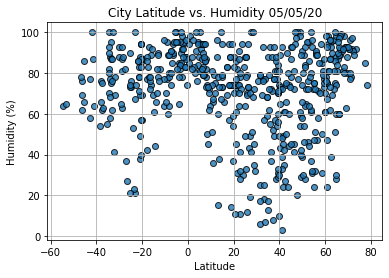

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

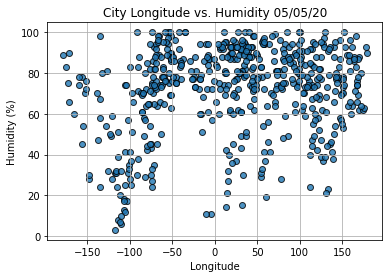

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lngs,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Longitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Longitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2a.png")
# Show plot.
plt.show()

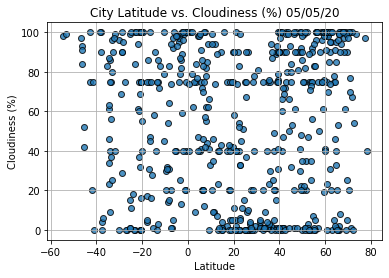

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

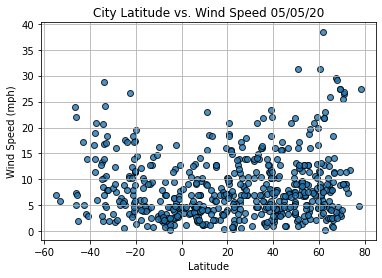

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

y = -0.32x + 68.99
The p-value is: 0.000
The r-value is: -0.562


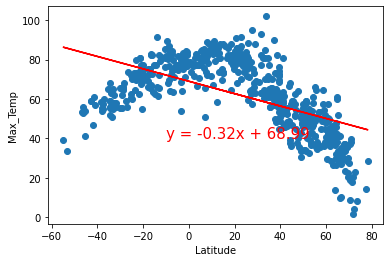

In [18]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp')
plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

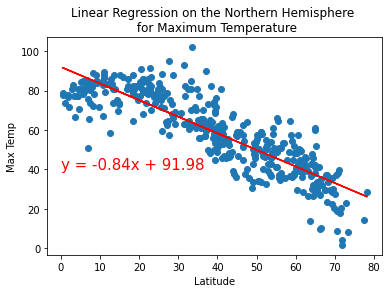

The r-value is -0.86


In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,40))


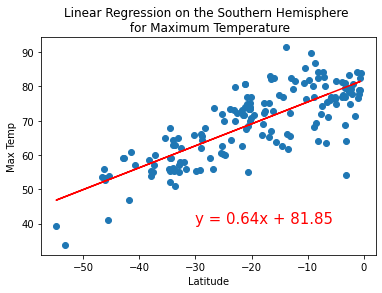

The r-value is 0.79


In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-30,40))



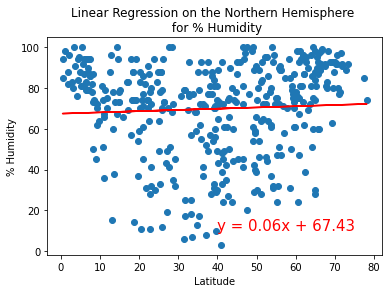

The r-value is 0.054


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

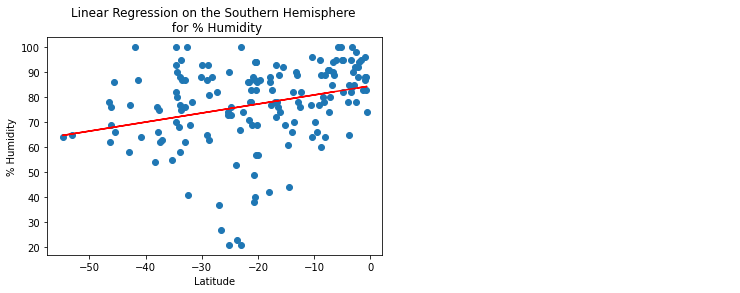

The r-value is 0.29


In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(40,10))

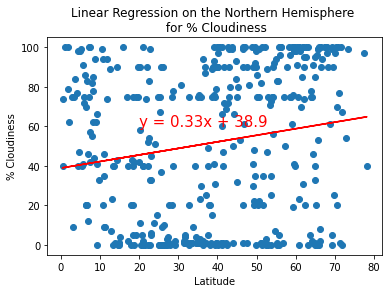

The r-value is 0.18


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(20,60))

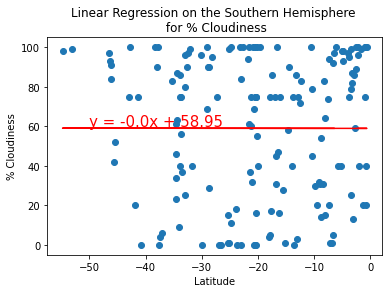

The r-value is -0.00064


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

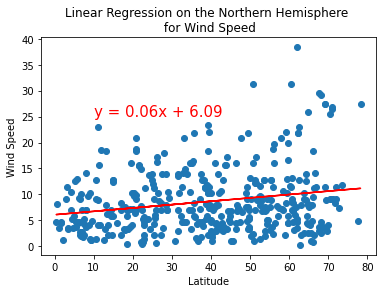

The r-value is 0.21


In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,25))

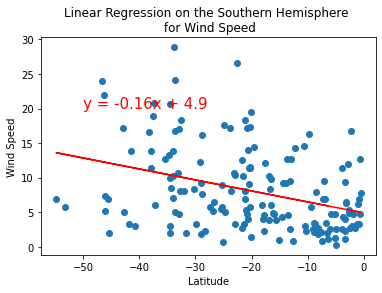

The r-value is -0.36


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))

In [39]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_api_key)
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]

#Assign the figure variable
fig = gmaps.figure()

# Set the center of the map and zoom so only one map is present
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp],
                                dissipating = False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
cloudy = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=cloudy, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [45]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 80
What is the maximum temperature you would like for your trip? 90


In [48]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)].dropna()
preferred_cities_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manaure,11.78,-72.44,83.50,70,94,18.63,CO,2020-05-06 00:25:09
2,Laguna,38.42,-121.42,82.40,28,1,11.41,US,2020-05-06 00:21:38
10,Butaritari,3.07,172.79,83.08,80,9,11.39,KI,2020-05-06 00:25:11
14,Hilo,19.73,-155.09,82.40,54,90,10.29,US,2020-05-06 00:25:11
22,Los Lunas,34.81,-106.73,80.60,13,1,3.36,US,2020-05-06 00:25:13
26,Atambua,-9.11,124.89,80.06,77,32,2.62,ID,2020-05-06 00:24:03
37,Saint George,37.10,-113.58,90.00,8,1,9.17,US,2020-05-06 00:20:19
43,Vaini,-21.20,-175.20,80.60,83,75,6.93,TO,2020-05-06 00:25:16
44,Tandalti,13.02,31.87,83.41,15,23,7.87,SD,2020-05-06 00:25:16
48,Santa Maria Del Oro,25.93,-105.37,88.61,12,0,7.05,MX,2020-05-06 00:25:17


In [62]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(20)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Manaure,CO,83.50,11.78,-72.44,
2,Laguna,US,82.40,38.42,-121.42,
10,Butaritari,KI,83.08,3.07,172.79,
14,Hilo,US,82.40,19.73,-155.09,
22,Los Lunas,US,80.60,34.81,-106.73,
26,Atambua,ID,80.06,-9.11,124.89,
37,Saint George,US,90.00,37.10,-113.58,
43,Vaini,TO,80.60,-21.20,-175.20,
44,Tandalti,SD,83.41,13.02,31.87,
48,Santa Maria Del Oro,MX,88.61,25.93,-105.37,


In [57]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_api_key}

In [64]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found...skipping")

Hotel not found...skipping
Hotel not found...skipping
Hotel not found...skipping
Hotel not found...skipping
Hotel not found...skipping
Hotel not found...skipping
Hotel not found...skipping


In [70]:
# Setting up the info_box_template
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))